In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import yaml
plt.style.use("../science.mplstyle")

from helpers.plotting import feature_labels, feature_bins
from helpers.physics_functions import bkg_fit_cubic, bkg_fit_quintic, bkg_fit_septic, get_bins, curve_fit_m_inv, calculate_test_statistic

In [2]:
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)
    
project_id = "lowmass"
particle_type = "upsilon"
data_id = "skimmed_data_2016H_30555"


path_to_data_dir = workflow["file_paths"]["data_storage_dir"]
path_to_data = f"{path_to_data_dir}/compiled_data/{project_id}"

with open(f"{path_to_data}/{data_id}_nojet", "rb") as input_file:
        all_data = pickle.load(input_file)


In [3]:
trigger_list = [x for x in all_data.keys() if (("HLT" in x) and ("samesign" not in x))]
#print(trigger_list)

all_events_OS = len(all_data["dimu_mass"])
all_events_SS = len(all_data["dimu_mass_samesign"])

num_pass = []
percent_pass = []

for trig in trigger_list:
    masses_OS = all_data["dimu_mass"]
    masses_SS = all_data["dimu_mass_samesign"]
    num_events_pass_OS = len(masses_OS[all_data[trig]])
    num_pass.append(num_events_pass_OS)
    percent_pass.append(round(100*num_events_pass_OS/all_events_OS, 2))
    
indices = np.argsort(percent_pass)


In [4]:
for i in indices[::-1]:
    
    line = trigger_list[i] + ": " + str(num_pass[i]) + " pass , "+  str(percent_pass[i])+"%"
    print(line)

HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ: 13145419 pass , 60.29%
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ: 12596280 pass , 57.77%
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ: 12348101 pass , 56.63%
HLT_Mu30_TkMu11: 8182540 pass , 37.53%
HLT_Mu40_TkMu11: 5718118 pass , 26.23%
HLT_Mu27_TkMu8: 5133996 pass , 23.55%
HLT_DoubleMu33NoFiltersNoVtx: 3714916 pass , 17.04%
HLT_L2DoubleMu28_NoVertex_2Cha_Angle2p5_Mass10: 3040504 pass , 13.94%
HLT_TripleMu_5_3_3_DZ_Mass3p8: 2523028 pass , 11.57%
HLT_DoubleMu38NoFiltersNoVtx: 2308064 pass , 10.59%
HLT_L2DoubleMu38_NoVertex_2Cha_Angle2p5_Mass10: 1472489 pass , 6.75%
HLT_TripleMu_12_10_5: 1140613 pass , 5.23%
HLT_DoubleMu8_Mass8_PFHT300: 974960 pass , 4.47%
HLT_Mu20_Mu10: 683876 pass , 3.14%
HLT_TkMu17_TrkIsoVVL_TkMu8_TrkIsoVVL: 680116 pass , 3.12%
HLT_Mu20_Mu10_DZ: 655966 pass , 3.01%
HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL: 653812 pass , 3.0%
HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL: 632767 pass , 2.9%
HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx: 557181 pass , 2.56%
HLT_Mu17_Mu

# Triggering studies

0
21803678


/global/homes/r/rmastand/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/tmp/ipykernel_2076072/2497521840.py:37: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


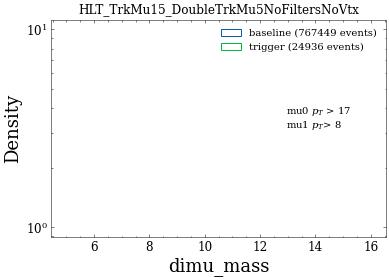

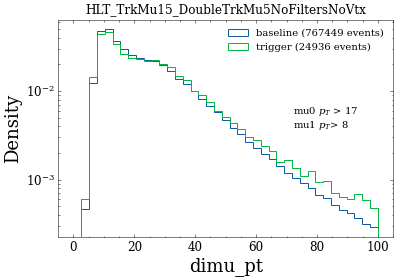

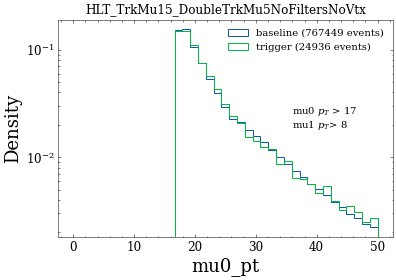

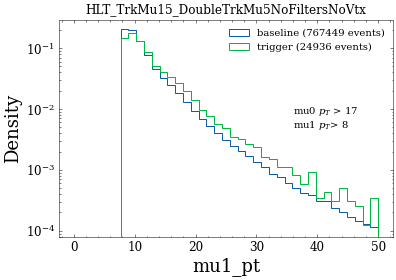

KeyError: 'mu0_eta'

<Figure size 432x288 with 0 Axes>

In [16]:
print(sum(all_data["mu1_pt"] > all_data["mu0_pt"]))
SB_left = 5#float(workflow["window_definitions"][particle_type]["SB_left"])
SR_left = 9#float(workflow["window_definitions"][particle_type]["SR_left"])
SR_right = 10.6#float(workflow["window_definitions"][particle_type]["SR_right"])
SB_right = 16#float(workflow["window_definitions"][particle_type]["SB_right"])

pt_high_cut = 17
pt_low_cut = 8

in_SB = (all_data["dimu_mass"] >= 20) & (all_data["dimu_mass"] <= 30)& (all_data["mu0_pt"] >= pt_high_cut)& (all_data["mu1_pt"] >= pt_low_cut)# & (all_data["mu0_iso04"] >= 0.55) & (all_data["mu1_iso04"] >= 0.55)

print(len(in_SB))

for trig in ["HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx" ]:
    
    vars_to_plot = ["dimu_mass", "dimu_pt", "mu0_pt", "mu1_pt","mu0_eta"]
    bins = {
        "dimu_mass": np.linspace(SB_left, SB_right, 40), 
         "dimu_pt": np.linspace(0, 100, 40), 
         "mu0_pt": np.linspace(0, 50, 40), 
        "mu1_pt": np.linspace(0, 50, 40), 
    
    }
    
    
    for var in vars_to_plot:

        events_all = all_data[var][in_SB]
        events_trig = all_data[var][in_SB][all_data[trig][in_SB]]

        plt.figure()
        plt.hist(events_all, bins = bins[var], label = f"baseline ({len(events_all)} events)", histtype = "step", density = True)
        plt.hist(events_trig, bins = bins[var], label = f"trigger ({len(events_trig)} events)", histtype = "step", density = True)
        label = f"mu0 $p_T$ > {pt_high_cut}\nmu1 $p_T$> {pt_low_cut}"
        plt.text(0.7, 0.5, label, transform = plt.gca().transAxes)
        #plt.xscale("log")
        plt.yscale("log")
        plt.ylabel("Density")
        plt.legend()
        plt.xlabel(var)
        plt.title(trig)
        plt.show()
    
    
    
    
   

5 16


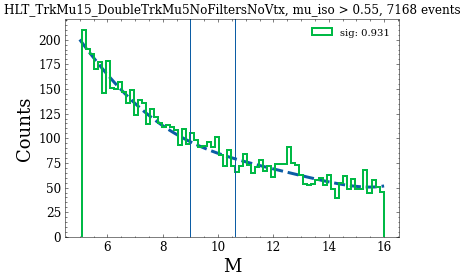

In [12]:
samesign = "_samesign"

bkg_fit_type = "quintic"
num_bins_SR = 12
bkg_fit_function = bkg_fit_quintic
plot_bins_all, plot_bins_SR, plot_bins_left, plot_bins_right, plot_centers_all, plot_centers_SR, plot_centers_SB = get_bins(SR_left, SR_right, SB_left, SB_right, num_bins_SR= num_bins_SR)
x = np.linspace(SB_left, SB_right, 100) 
plot_bins_all, plot_bins_SR, plot_bins_left, plot_bins_right, plot_centers_all, plot_centers_SR, plot_centers_SB = get_bins(SR_left, SR_right, SB_left, SB_right, num_bins_SR= num_bins_SR)

print(SB_left, SB_right)

trig="HLT_TrkMu15_DoubleTrkMu5NoFiltersNoVtx"


iso_cut = 0.55


in_SB = (all_data[f"dimu_mass{samesign}"] >= SB_left) & (all_data[f"dimu_mass{samesign}"] <= SB_right)& (all_data[f"mu0_iso04{samesign}"] >= iso_cut) & (all_data[f"mu1_iso04{samesign}"] >= iso_cut)&(all_data[f"mu0_pt{samesign}"] >= pt_high_cut)& (all_data[f"mu1_pt{samesign}"] >= pt_low_cut)

masses = all_data[f"dimu_mass{samesign}"][in_SB][all_data[f"{trig}{samesign}"][in_SB]]

#masses = np.random.choice(masses, size = 10000)

popt_0, pcov, _, _, _ = curve_fit_m_inv(masses, bkg_fit_type, SR_left, SR_right, plot_bins_left, plot_bins_right, plot_centers_SB)

plt.figure()
plt.plot(x, bkg_fit_function(x, *popt_0), lw = 3, linestyle = "dashed")
sig = np.sqrt(calculate_test_statistic(masses, bkg_fit_function, bkg_fit_type, plot_bins_SR, plot_centers_SR, SR_left, SR_right, popt_0, pcov))
plt.hist(masses, bins = plot_bins_all, lw = 2, histtype = "step", density = False, label = f"sig: {round(sig,3)}")
plt.legend()
plt.title(f"{trig}, mu_iso > {iso_cut}, {len(masses)} events")

plt.axvline(SR_right)
plt.axvline(SR_left)
plt.xlabel("M")
plt.ylabel("Counts")
plt.show()

# Various kinematic observables

In [ ]:
vars_to_plot = all_data.keys()

for var in vars_to_plot:
    
    if ("samesign" not in var) and ("HLT" not in var):
    
        plt.figure()
        plt.hist(all_data[var], bins = feature_bins[var], histtype = "step", density = True, label = "OS")
        plt.hist(all_data[var+"_samesign"], bins = feature_bins[var], histtype = "step", density = True, label = "SS")
        plt.xlabel(feature_labels[var])
        plt.ylabel("Density")
        plt.legend()
        plt.show()


Look at the samesign dimuon mass spectrum

In [ ]:



plt.figure(figsize = (5,3))

plt.hist(all_data["dimu_mass"], bins = np.linspace(SB_left, SB_right, 50), histtype = "step", label = f"OS")
plt.hist(all_data["dimu_mass_samesign"], bins = np.linspace(SB_left, SB_right, 50), histtype = "step", label = f"SS")


plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()



In [ ]:
muon_iso_cuts = np.arange(0, 1, 0.1) # anti-isolation cut -- want muon iso to be ABOVE this, which means more junk
dimuon_pt_cuts = np.arange(50, 150, 10)

isoc = 0
ptc = 0

cut_pt = False


plt.figure(figsize = (7,5))
    

filters, labels = [], []

if cut_pt:
    for ptc in dimuon_pt_cuts: 
        loc_filter = (all_data["mu0_iso04"]>=isoc) & (all_data["mu1_iso04"]>=isoc)  &(all_data["dimu_pt"]>=ptc) 
        filters.append(loc_filter)
        labels.append(f"$\mu\mu$ $p_T$ > {round(ptc, 2)} GeV")

else:
    for isoc in muon_iso_cuts: 
        loc_filter = (all_data["mu0_iso04"]>=isoc) & (all_data["mu1_iso04"]>=isoc)   &(all_data["dimu_pt"]>=ptc) 
        filters.append(loc_filter)
        labels.append(f"$\mu$ iso R04 > {round(isoc, 2)}")

for i in range(len(filters)):
    
    loc_data = all_data["dimu_mass"][filters[i]]
    N_events = len(loc_data[(loc_data >= SB_left) & (loc_data <= SB_right)])

    popt_0, pcov, _, _, _ = curve_fit_m_inv(loc_data, bkg_fit_type, SR_left, SR_right, plot_bins_left, plot_bins_right, plot_centers_SB)
    sig = np.sqrt(calculate_test_statistic(loc_data, bkg_fit_function, bkg_fit_type, plot_bins_SR, plot_centers_SR, SR_left, SR_right, popt_0, pcov))
    plt.hist(loc_data, bins = plot_bins_all, lw = 2, color = f"C{i}", histtype = "step", density = False, label = labels[i]+f". {N_events} events. S/sqrt(B): {round(sig,3)}")
    plt.plot(x, bkg_fit_function(x, *popt_0), lw = 3, color = f"C{i}", linestyle = "dashed")

plt.yscale("log")
plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0), fontsize = 14)
plt.show()

